In [19]:
from copy import deepcopy

In [20]:
Roraima = {
    'Uiramutã': ['Pacaraima', 'Normandia'],
    'Pacaraima': ['Uiramutã', 'Normandia', 'Boa Vista', 'Amajari'],
    'Normandia': ['Uiramutã', 'Bonfim', 'Boa Vista', 'Pacaraima'],
    'Boa Vista': ['Pacaraima', 'Normandia', 'Bonfim', 'Cantá',
                  'Mucajaí', 'Alto Alegre', 'Amajari'],
    'Bonfim': ['Caracaraí', 'Cantá', 'Boa Vista', 'Normandia'],
    'Cantá': ['Bonfim', 'Caracaraí', 'Iracema', 'Mucajaí', 'Boa Vista'],
    'Amajari': ['Pacaraima', 'Boa Vista', 'Alto Alegre'],
    'Alto Alegre': ['Amajari', 'Boa Vista', 'Mucajaí', 'Iracema'],
    'Mucajaí': ['Alto Alegre', 'Boa Vista', 'Cantá', 'Iracema'],
    'Iracema': ['Alto Alegre', 'Mucajaí', 'Cantá', 'Caracaraí'],
    'Caracaraí': ['Iracema', 'Cantá', 'Bonfim', 'Caroebe', 'São João da Baliza',
                  'São Luiz', 'Rorainópolis'],
    'Caroebe': ['São João da Baliza', 'Caracaraí'],
    'São João da Baliza': ['Rorainópolis', 'São Luiz', 'Caracaraí', 'Caroebe'],
    'Rorainópolis': ['Caracaraí', 'São Luiz', 'São João da Baliza'],
    'São Luiz': ['Caracaraí', 'São João da Baliza', 'Rorainópolis'],
}

class Problema:
    def __init__(self, bordas, cores):
        # bordas é um dicionário onde cada chave é uma região
        # e seu valor é uma lista de suas regiões fronteiriças
        self.bordas = bordas

        # cores é uma lista com as 4 cores a serem usadas na coloração
        self.cores = cores

class No:
    def __init__(self, mapa, regiao, cor):
        # mapa é um dicionario
        # cada chave é uma região, seu valor é sua cor atual
        # ex: {'São Paulo': 'azul', 'Paraíba': 'vermelho'}
        # representa diferentes estados do sistema
        self.mapa = deepcopy(mapa)

        # ao criar um novo nó, passando uma região e uma cor,
        # o nó é criado com a coloração atualizada
        self.mapa[regiao] = cor

    def __str__(self):
        # só imprime as regiões preenchidas, por legibilidade
        string = ''
        for regiao in self.mapa:
            if self.mapa[regiao] != '':
                string = string + f'{regiao}: {self.mapa[regiao]}\n'
        return string

    def __repr__(self):
        return self.__str__()
    
    # Ramifica o nó, método a ser chamado na busca
    # retorna uma lista com os filhos do nó
    def filhos(self, problema, proxima_regiao):
        filhos = []
        for cor in problema.cores:
            filho = No(self.mapa, proxima_regiao, cor)
            filhos.append(filho)
        return filhos
    
    # varre o mapa, verifica se há regiões fronteiriças com a mesma cor
    # será usado para podar nós com estados inviáveis
    def is_viavel(self, problema):
        for regiao in self.mapa:

            if self.mapa[regiao] == '':
                return True
            
            for borda in problema.bordas[regiao]:
                if self.mapa[regiao] == self.mapa[borda]:
                    return False
                
        return True

    # varre o mapa, verifica se todas as regiões estão preenchidas
    def is_preenchido(self):
        for regiao in self.mapa:

            if self.mapa[regiao] == '':
                return False
        
        return True
    
    '''
    is_viavel verifica se o nó respeita a restrição do problema: 
        não ter 4 cores iguais em regiões fronteiriças
        mas não verifica se o mapa está completamente colorido

    is_preenchido verifica se o mapa do nó está completamente colorido mas
        não verifica se o nó é viável
        
    é importante usar os métodos juntos para determinar se o nó representa
        o estado objetivo
    '''

COLORACAO_INICIANDO = 1
COLORACAO_EM_ANDAMENTO = 2
COLORACAO_SUCESSO = 3
COLORACAO_SEM_SUCESSO = 0

# classe para realizar a busca
class Coloracao:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [] 
        #  fronteira do problema de busca

        self.status = COLORACAO_INICIANDO

        # mapa é um dicionário com todas as regiões e suas cores
        # começa em branco
        # representa o estado inicial do sistema
        self.mapa = {}
        for regiao in self.problema.bordas:
            self.mapa[regiao] = ''

    def passo(self):
        if self.status == COLORACAO_INICIANDO:

            primeira_região = list(self.mapa.keys())[0]
            # pegamos a primeira região do dicionário, que está todo em branco

            # criaremos 4 nós, para as 4 possíveis cores para a primeira região
            for cor in self.problema.cores:
                novo_no = No(self.mapa, primeira_região, cor)
                self.fronteira.append(novo_no)
            
            self.status = COLORACAO_EM_ANDAMENTO

            return
        
        try:
            proximo_no = self.fronteira.pop(-1)
        except IndexError:
            self.situacao = COLORACAO_SEM_SUCESSO
            return

        proxima_regiao = next(regiao for regiao in proximo_no.mapa if proximo_no.mapa[regiao] == '')
        # se der erro, é pq o mapa está cheio
        # não dará erro, pois a cada passo é testado se o mapa dos nós a serem empilhados está cheio

        for filho in proximo_no.filhos(self.problema, proxima_regiao):

            # verificando se o filho é viavel antes de adicioná-lo na fronteira
            if filho.is_viavel(self.problema):

                # verificando se o filho é objetivo
                if filho.is_preenchido():
                    self.status = COLORACAO_SUCESSO
                    self.mapa = filho.mapa
                    return
                
                else: 
                    self.fronteira.append(filho)
        
        return
    
    def executar(self):
        while self.status == COLORACAO_EM_ANDAMENTO or self.status == COLORACAO_INICIANDO:
            self.passo()
        return 
    
    def show_status(self):
        if self.status == COLORACAO_INICIANDO:
            return 'Coloração iniciando'
        elif self.status == COLORACAO_EM_ANDAMENTO:
            return 'Coloração em andamento'
        elif self.status == COLORACAO_SUCESSO:
            return 'Coloração bem sucedida'
        elif self.status == COLORACAO_SEM_SUCESSO:
            return 'Coloração sem sucesso'
        
    def imprime_mapa_colorido(self):
        for regiao in self.mapa:
            print(f'{regiao}: {self.mapa[regiao]}')
        return

In [21]:
prob_ex = Problema(Roraima, ['r', 'b', 'g', 'w'])
col_ex = Coloracao(prob_ex)

In [22]:
col_ex.show_status()

'Coloração iniciando'

In [23]:
col_ex.executar()

In [24]:
col_ex.show_status()

'Coloração bem sucedida'

In [25]:
col_ex.mapa

{'Uiramutã': 'w',
 'Pacaraima': 'g',
 'Normandia': 'b',
 'Boa Vista': 'w',
 'Bonfim': 'g',
 'Cantá': 'b',
 'Amajari': 'b',
 'Alto Alegre': 'g',
 'Mucajaí': 'r',
 'Iracema': 'w',
 'Caracaraí': 'r',
 'Caroebe': 'w',
 'São João da Baliza': 'g',
 'Rorainópolis': 'w',
 'São Luiz': 'b'}

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

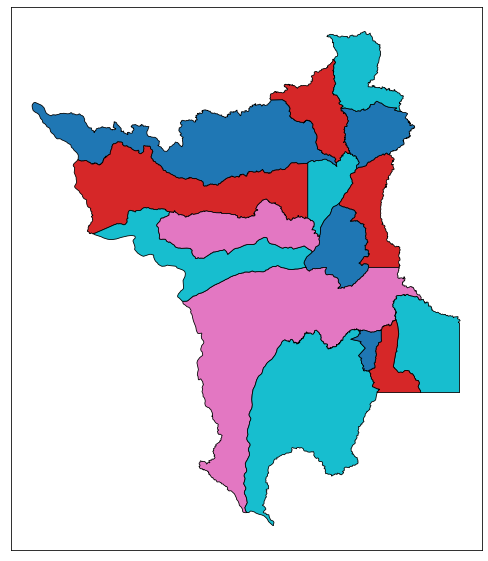

In [39]:
geojson_path = "geojs-14-mun.json"
gdf = gpd.read_file(geojson_path)

for index, row in gdf.iterrows():
    muni = row["name"]
    if muni in col_ex.mapa:
        color = col_ex.mapa[muni]
        gdf.loc[index, 'color'] = color

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='color', linewidth=0.8, edgecolor='black', legend=False)

ax.set_xticks([])
ax.set_yticks([])

plt.show()